# Color-Magnitude Diagrams of NGC 2516

Determining the age and chemical composition of NGC 2516 through color-magnitude diagram (CMD) fitting.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Broad band optical photometry is availble for NGC 2516 from Jeffries, Thurston, & Hambly ([2001, A&A, 375, 863](http://adsabs.harvard.edu/abs/2001A%26A...375..863J)). 

In [2]:
ngc2516 = np.genfromtxt('data/jeff_2001.tsv', delimiter=';', comments='#')
ngc2516 = np.array([star for star in ngc2516 if star[9] == 1])  # extract candidate members

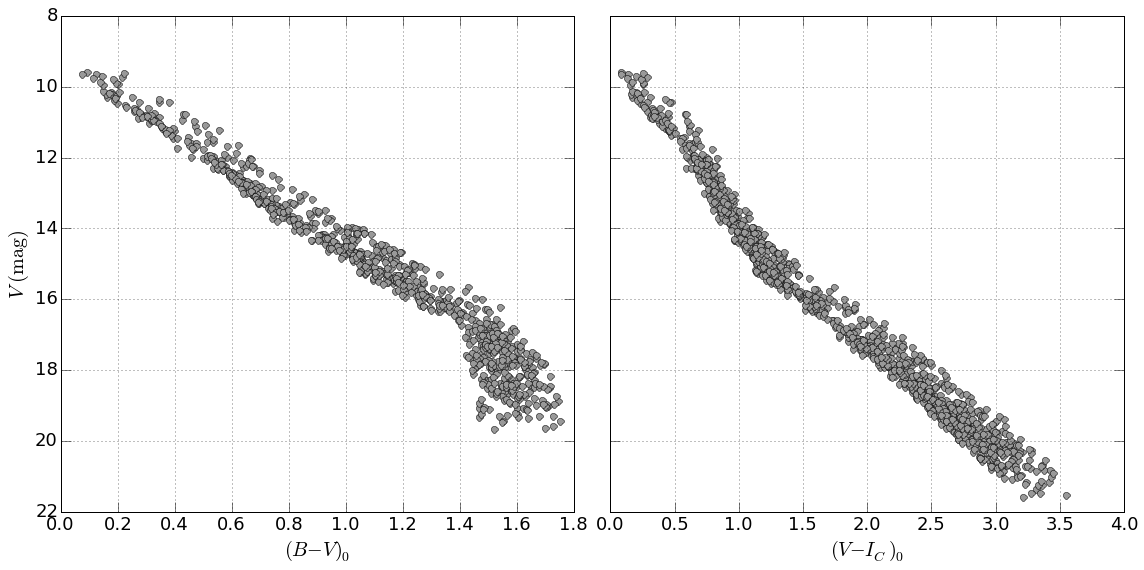

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

for axis in ax:
    axis.grid(True)
    axis.set_ylim(22., 8.)
    axis.tick_params(which='major', axis='both', length=10., labelsize=18.)
ax[0].set_ylabel('$V\\ {\\rm(mag)}$', fontsize=20.)
ax[0].set_xlabel('$(B - V)_0$', fontsize=20.)
ax[1].set_xlabel('$(V - I_C)_0$', fontsize=20.)

ax[0].plot(ngc2516[:,4], ngc2516[:,3], 'o', markersize=7.0, c='#999999')
ax[1].plot(ngc2516[:,5], ngc2516[:,3], 'o', markersize=7.0, c='#999999')

fig.tight_layout()

When fitting CMDs with isochrones, a question arises of whether we should fit the CMD with or without candidate binary stars and also whether the we should fit the median of the sequence, the lower edge, or upper edge of the sequence. For now, we'll fit the isochrone to the median value of the _single star_ sequence. That is, we're going to remove candidate binaries from the membership sample.

In [4]:
ngc2516_sin = np.array([star for star in ngc2516 if star[10] == 0])  # extract candidate non-binary members
ngc2516_bin = np.array([star for star in ngc2516 if star[10] == 1])  # extract candidate binary members

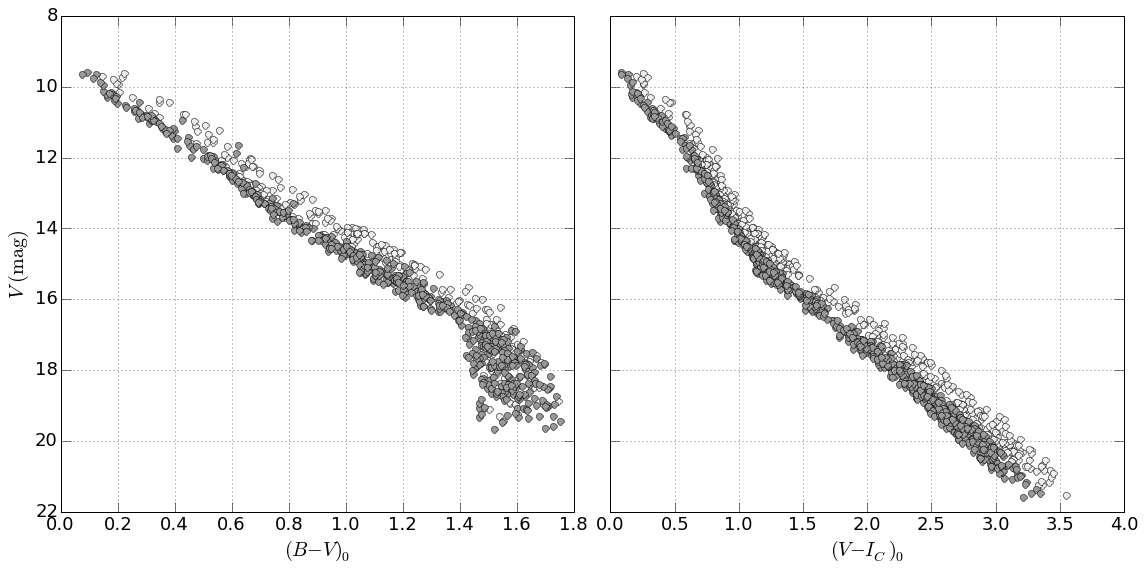

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

for axis in ax:
    axis.grid(True)
    axis.set_ylim(22., 8.)
    axis.tick_params(which='major', axis='both', length=10., labelsize=18.)
ax[0].set_ylabel('$V\\ {\\rm(mag)}$', fontsize=20.)
ax[0].set_xlabel('$(B - V)_0$', fontsize=20.)
ax[1].set_xlabel('$(V - I_C)_0$', fontsize=20.)

ax[0].plot(ngc2516_bin[:,4], ngc2516_bin[:,3], 'o', markersize=7.0, c='#eeeeee')
ax[1].plot(ngc2516_bin[:,5], ngc2516_bin[:,3], 'o', markersize=7.0, c='#eeeeee')
ax[0].plot(ngc2516_sin[:,4], ngc2516_sin[:,3], 'o', markersize=7.0, c='#999999')
ax[1].plot(ngc2516_sin[:,5], ngc2516_sin[:,3], 'o', markersize=7.0, c='#999999')

fig.tight_layout()

In the above CMDs, candidate binary members are shown as light grey points, while candidate single-star members are shown as dark grey points. Note that in the $(B-V)_0/V$ CMD there are numerous binary candidates lying behind the single-star candidate points. 

We can now use the single-star sequence to estimate the distance modulus, reddening and extinction coefficients, the cluster age, and chemical composition. The latter depends on which set of model isochrones that we adopt, with explicit regard for the solar abundance distribution adopted by the model sets. Helioseismic evidence lends favor to the Grevesse & Sauval (1998) solar abundance distribution, as does the morphology of the solar-age open cluster M67, where the development of a convective core appears at too high a mass when adopting the Grevesse, Asplund, & Sauval (2007) solar composition (VandenBerg et al. 2008). 

However, while stellar interior structure favors the adoption of solar abundance distributions with a higher metallicity, results from studies of broad band colors of low-mass stars indicate that more modern values of the solar metallicity are preferred, particularly with repsect to the revised oxygen abundance. This appears to not just be the result of revised molecular line lists (e.g., TiO, H$_2$O), but is related more to the lower abundance of oxygen (Baraffe et al. 2015; Feiden, Eriksson, & Christophe in prep). Therefore, we fit CMDs for NGC 2516 with isochrones with both the GS98 and GAS07 solar abundance distributions. 

Note that more recent measurements of the solar abundance distribution have increased the overall metallicity from that presented by GAS07, but this has only a small impact on model interior structure and derived spectra / bolometric corrections (B. Edvardsson, priv. comm.).

We can adopt prior estimates of the distance modulus and reddening coefficients as a starting point for our analysis. Terndrup et al. estimated that $E(B-V) = 0.05 \pm 0.01$ and $(m - M) = 7.96 \pm 0.05$. We'll need to use only a subset of the observations, as models have trouble accurately reproducing CMDs of the lowest mass stars, particularly below the M-dwarf hook, which is visible in the above $(B-V)/V$ CMD around $V \sim 17$. 

This hook is a rather distinct feature, which may be able to help set lower limits on the age of cluster, and perhaps cluster distance and reddening. While the models cannot reproduce the precise morphology of the feature, the feature does occur in both the models and observations at approximately the same $V$-band magnitude.

As an example, we'll start with 120 Myr isochrones (example, on hand) using cluster properties from Terndrup et al.

In [6]:
iso_gs98  = np.genfromtxt('data/dmestar_00120.0myr_z+0.00_a+0.00_phx.iso')
iso_gas07 = np.genfromtxt('data/dmestar_00120.0myr_z+0.00_a+0.00_marcs.iso')
iso_vc03  = np.genfromtxt('/Users/grefe950/evolve/ngc2516/iso/nmag/dmestar_00150myr_fehp000_sc0.0_tc1.0.iso')
iso_test  = np.genfromtxt('/Users/grefe950/evolve/scripts/iso/dmestar_00175myr_fehp000.iso')
trk_test1 = np.genfromtxt('/Users/grefe950/evolve/color/m3900_bvri.trk')
trk_test2 = np.genfromtxt('/Users/grefe950/evolve/color/m4700_bvri.trk')

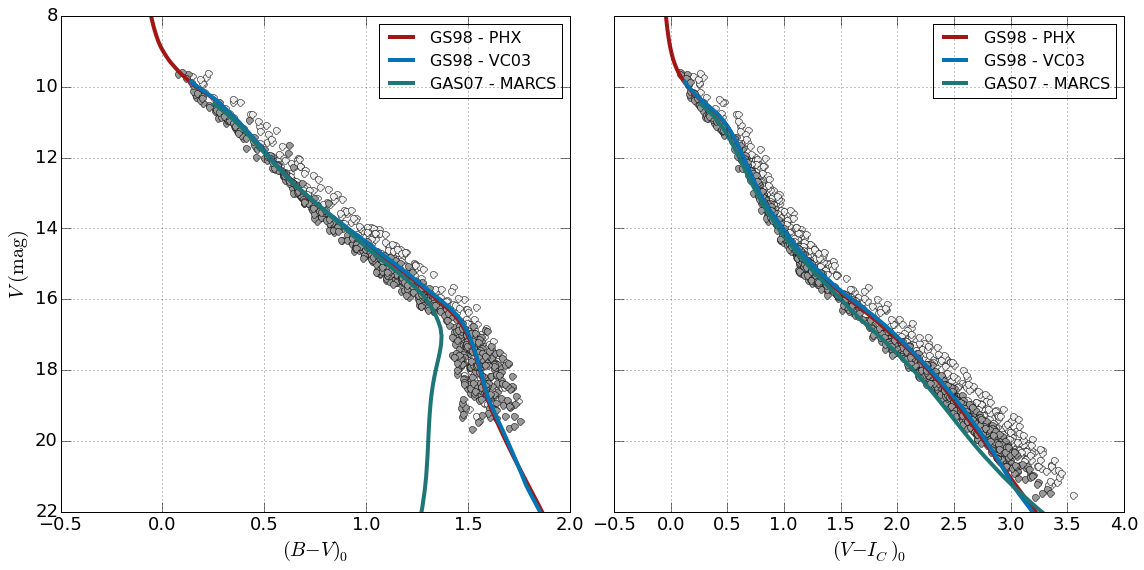

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

for axis in ax:
    axis.grid(True)
    axis.set_ylim(22., 8.)
    axis.tick_params(which='major', axis='both', length=10., labelsize=18.)
ax[0].set_ylabel('$V\\ {\\rm(mag)}$', fontsize=20.)
ax[0].set_xlabel('$(B - V)_0$', fontsize=20.)
ax[1].set_xlabel('$(V - I_C)_0$', fontsize=20.)

# (B-V)
ax[0].plot(ngc2516_bin[:,4], ngc2516_bin[:,3], 'o', markersize=7.0, c='#eeeeee')
ax[0].plot(ngc2516_sin[:,4], ngc2516_sin[:,3], 'o', markersize=7.0, c='#999999')
ax[0].plot(iso_gs98[:,7] + 0.05, iso_gs98[:,6] + 7.95, '-', lw=4, c='#A21616', 
           label='GS98 - PHX')
ax[0].plot((iso_vc03[:,13] - iso_vc03[:,14]) + 0.05, iso_vc03[:,14] + 7.95, '-', lw=4, c='#0473B3', 
           label='GS98 - VC03')
ax[0].plot((iso_gas07[:,6] - iso_gas07[:,7]) + 0.05, iso_gas07[:,7] + 7.95, '-', lw=4, c='#1F7676', 
           label='GAS07 - MARCS')
ax[0].legend(fontsize=16.)

# (V-Ic)
ax[1].plot(ngc2516_bin[:,5], ngc2516_bin[:,3], 'o', markersize=7.0, c='#eeeeee')
ax[1].plot(ngc2516_sin[:,5], ngc2516_sin[:,3], 'o', markersize=7.0, c='#999999')
ax[1].plot(iso_gs98[:,10] + 1.25*0.05, iso_gs98[:,6] + 7.95, '-', lw=4, c='#A21616', 
           label='GS98 - PHX')
ax[1].plot((iso_vc03[:,14] - iso_vc03[:,16]) + 1.25*0.05, iso_vc03[:,14] + 7.95, '-', lw=4, c='#0473B3', 
           label='GS98 - VC03')
ax[1].plot((iso_gas07[:,7] - iso_gas07[:,8]) + 1.25*0.05, iso_gas07[:,7] + 7.95, '-', lw=4, c='#1F7676', 
           label='GAS07 - MARCS')
ax[1].legend(fontsize=16.)

fig.tight_layout()

Take note that the red isochrone is computed with the GS98 solar abundance distribution and the blue isochrone is computed with the GAS07 abundance distribution.

Without much effort, the isochrones reproduce the properties of upper main sequence in the CMDs. There are clear issues at the reddest $(B-V)_0$ colors, but as we noted earlier, the M-dwarf knee occurs at approximately the same location in both the observations and the models. There is a slow decline in the isochrone's $V$-band magnitude prior to the onset of the M-dwarf knee in the GAS07 isochrone, but the dominant knee feature is inline with a similar feature in the data. Similarly, although the GS98 isochrone is clearly too luminous [actually, since the other CMD is so well reproduced, it's likely that the $(B-V)$ color of the GS98 isochrone is incorrect], the morphology at and below the M-dwarf knee is well reproduced. 

To extract an age, composition, reddening, etc., we need to apply a quantitative metric to assign goodness of fit. A typical $\chi^2$ metric might be useful as a first pass, cycling through several ages (CMDs are likely insensitive to age), metallicities, and reddening/extinction coefficients. Since there is no turn-off or sub-giant-branch present in the data, a more sophisticated approach examining number counts at various evolutionary stages would be uninformative. That is, unless there is more data available on the open cluster archive, [WEBDA](https://www.univie.ac.at/webda/).

Naturally, [WEBDA has a collection of data on NGC 2516](https://www.univie.ac.at/webda/cgi-bin/ocl_page.cgi?cluster=NGC+2516). At least one reference contains target sources on the sub-giant and red-giant branches. These should be incorporated into our fitting to permit a reasonable age estimate. The archive indicates there are at least 9 Ap stars and 1 Am stars. A recent article proposed using Ap stars to estimate ages of clusters. In fact, Silaj & Landstreet ([2014, A&A, 566, A132](http://dx.doi.org/10.1051/0004-6361/201321468)) have used magnetic Ap stars to estimate the age of NGC 2516.

Loading WEBDA $UBV$ photometric data.

In [8]:
webda_UBV = np.genfromtxt('./data/webda_ubv.dat')
webda_VI = np.genfromtxt('./data/webda_vic.dat')

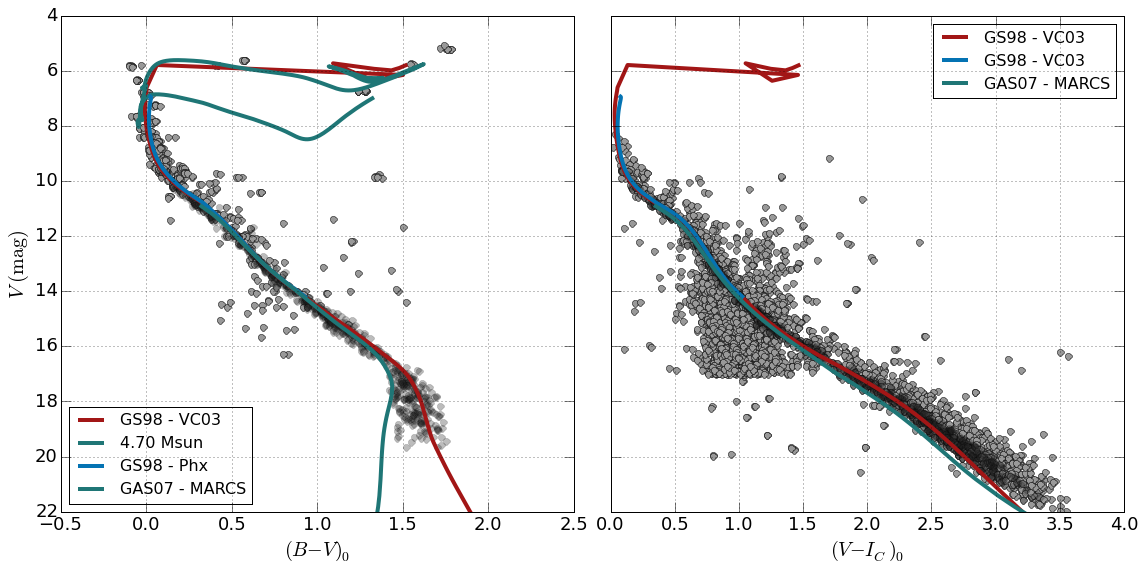

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

m_M = 8.00
Ebv = 0.12
Av  = 3.1*Ebv

for axis in ax:
    axis.grid(True)
    axis.set_ylim(22., 4.)
    axis.tick_params(which='major', axis='both', length=10., labelsize=18.)
ax[0].set_ylabel('$V\\ {\\rm(mag)}$', fontsize=20.)
ax[0].set_xlabel('$(B - V)_0$', fontsize=20.)
ax[1].set_xlabel('$(V - I_C)_0$', fontsize=20.)

# (B-V)
ax[0].plot(webda_UBV[:,3], webda_UBV[:,2], 'o', markersize=7.0, c='#999999')
ax[0].plot(ngc2516_sin[:,4], ngc2516_sin[:,3], 'o', markersize=7.0, c='#222222', alpha=0.3)
ax[0].plot(iso_gs98[:,7] + Ebv, iso_gs98[:,6] + m_M + Av, '-', lw=4, c='#A21616', 
           label='GS98 - VC03')
ax[0].plot(trk_test2[:,5] + Ebv, trk_test2[:,4] + m_M + Av, '-', lw=4, c='#1F7676', 
           label='4.70 Msun')
ax[0].plot(iso_test[:,5] + Ebv, iso_test[:,4] + m_M + Av, '-', lw=4, c='#0473B3', 
           label='GS98 - Phx')
ax[0].plot((iso_gas07[:,6] - iso_gas07[:,7]) + Ebv, iso_gas07[:,7] + m_M + Av, '-', lw=4, c='#1F7676', 
           label='GAS07 - MARCS')
ax[0].legend(loc=3, fontsize=16.)

# (V-Ic)
ax[1].plot(webda_VI[:,3], webda_VI[:,2], 'o', markersize=7.0, c='#999999')
ax[1].plot(ngc2516_sin[:,5], ngc2516_sin[:,3], 'o', markersize=7.0, c='#222222', alpha=0.3)
ax[1].plot(iso_gs98[:,10] + 1.25*Ebv, iso_gs98[:,6] + m_M + Av, '-', lw=4, c='#A21616', 
           label='GS98 - VC03')
ax[1].plot(iso_test[:,8] + 1.25*Ebv, iso_test[:,4] + m_M + Av, '-', lw=4, c='#0473B3', 
           label='GS98 - VC03')
ax[1].plot((iso_gas07[:,7] - iso_gas07[:,8]) + 1.25*Ebv, iso_gas07[:,7] + m_M + Av, '-', lw=4, c='#1F7676', 
           label='GAS07 - MARCS')
ax[1].legend(fontsize=16.)

fig.tight_layout()

Notably, the $(B-V)/V$ CMD has sources along the sub-giant and giant branches, and seemingly stars near the base of the RGB. WEBDA flags stars extending from the MS between $V = 6 \rightarrow 8$ as blue stragglers. A more positive identification is required to ensure this is not an extension of the MS itself. 

Current Phoenix color-Teff transformations provided by Dotter do not extend to hot enough temperatures to permit a fully CMD analysis. The turn-off for NGC 2516 appears to occur somewhere in the vicinity of $4.0 \pm 0.5 M_{\odot}$, at least based on a quick analysis. Therefore, we adopt the semi-empirical bolometric corrections from VandenBerg & Clem (2003), which provide reasonble agreement with purely synthetic transformations at hotter temperatures. From this, we can see that a 120 Myr isochrone is too young, based on the MS turnoff. However, it should be noted that we must use a more rigorous isochrone computation to reliably determine the CMD morphology from the turn-off to the base of the RGB.

This is compatible with estimates from Silaj & Landstreet (2014), who estimated an age of approximately 160 Myr from CMD fitting, but a younger age of 125 Myr from HRD fitting. Their analysis did not include a complete CMD or HRD, but only from a select few star (although they were located at critical junctures). Nevertheless, the few apparent sub-giant branch stars are crucial to identifying an appropriate isochrone, as they provide an estimate of the morphology between the MSTO and bRGB.

## M Dwarf Knee

Here, we zoom in on this feature and arbitrarly shift the GS98 isochrone in distance so that it is conincident with the empirical sequence. Similarly, we provide an arbitrary shift in reddening to the GAS07 isochrone to provide conicidence with the M-dwarf knee.

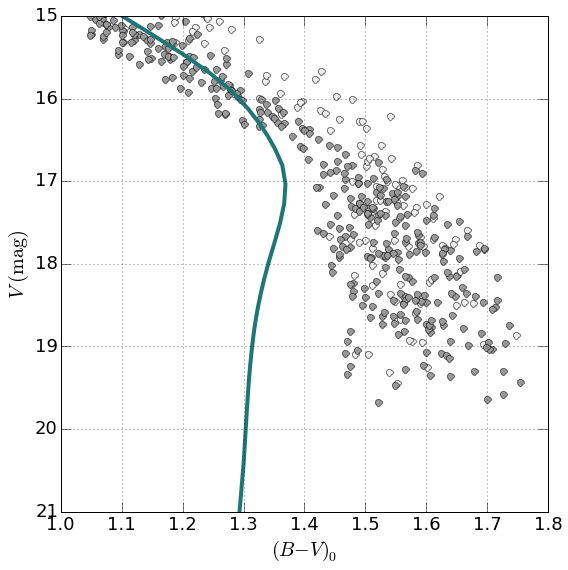

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))


ax.grid(True)
ax.set_xlim(1.0, 1.8)
ax.set_ylim(21., 15.)
ax.tick_params(which='major', axis='both', length=10., labelsize=18.)
ax.set_ylabel('$V\\ {\\rm(mag)}$', fontsize=20.)
ax.set_xlabel('$(B - V)_0$', fontsize=20.)

# (B-V)
ax.plot(ngc2516_bin[:,4], ngc2516_bin[:,3], 'o', markersize=7.0, c='#eeeeee')
ax.plot(ngc2516_sin[:,4], ngc2516_sin[:,3], 'o', markersize=7.0, c='#999999')

# arbitrary (re: unphysical) shift to reddening
ax.plot((iso_gs98[:,6] - iso_gs98[:,7]), iso_gs98[:,7] + 7.95, '-', lw=3, c='#A21616')

# arbitrary (re: unphysical) shift to reddening
ax.plot((iso_gas07[:,6] - iso_gas07[:,7]) + 0.05, iso_gas07[:,7] + 7.95, '-', lw=4, c='#1F7676')

fig.tight_layout()

The difficult part of using this feature is defining it quantitatively. There is clearly a rounded bend to the knee followed by a nearly vertical drop before (potentially) recovering to a more shallower grade. If we can quantitatively define at which magnitude the slope becomes nearly vertical, it can be used a "standard candle" of sorts, with that feature corresponding to an absolute magnitude in $V$, or even in other passbands, like $K$, which is better determined by stellar models. 

Unfortunately for NGC 2516, there is no reliable $K$-band photometry across the entire CMD, seemingly only at lower masses. We may attempt $I_C$-band for this data set,

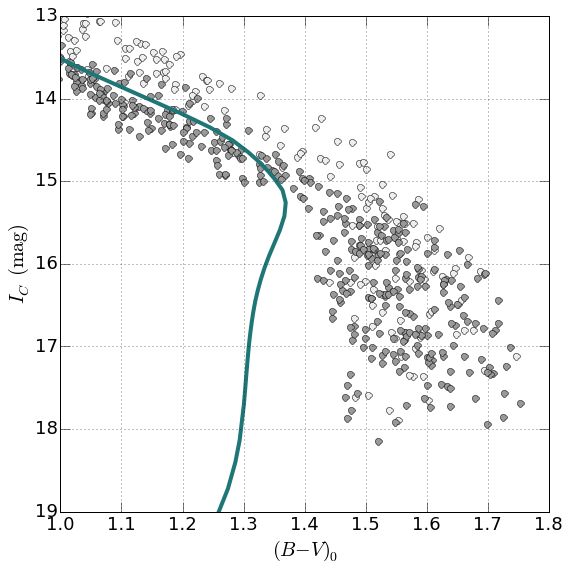

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))


ax.grid(True)
ax.set_xlim(1.0, 1.8)
ax.set_ylim(19., 13.)
ax.tick_params(which='major', axis='both', length=10., labelsize=18.)
ax.set_ylabel('$I_C\\ {\\rm(mag)}$', fontsize=20.)
ax.set_xlabel('$(B - V)_0$', fontsize=20.)

# (B-V)
ax.plot(ngc2516_bin[:,4], ngc2516_bin[:,3]-ngc2516_bin[:,4], 'o', markersize=7.0, c='#eeeeee')
ax.plot(ngc2516_sin[:,4], ngc2516_sin[:,3]-ngc2516_sin[:,4], 'o', markersize=7.0, c='#999999')

# arbitrary (re: unphysical) shift to reddening
ax.plot((iso_gs98[:,6] - iso_gs98[:,7]) +0.05, iso_gs98[:,9] + 7.95, '-', lw=3, c='#A21616')

# arbitrary (re: unphysical) shift to reddening
ax.plot((iso_gas07[:,6] - iso_gas07[:,7]) + 0.05, iso_gas07[:,8] + 7.95, '-', lw=4, c='#1F7676')

fig.tight_layout()

With the $(B-V)$ color of the GS98 isochrone providing the largest obstacle, it doesn't matter which CMD we use. This may be an interesting idea to follow up, though I suspect there are a number of significant uncertainties with the theoretical models that may create problems. Shifting this idea to the `dev` notebook and moving on.

